In [24]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import mdtraj as md
import numpy as np
import pandas as pd
from pymbar import timeseries
import seaborn as sns
from scipy import signal

sns.set_style('whitegrid')

base_path = 'output/task_25'

In [25]:
traj = md.load(os.path.join(base_path, 'shear.xtc'), 
               top=os.path.join(base_path, 'nvt.gro'))

In [26]:
dt = traj.time[1] - traj.time[0]
toss = 1000/dt # 1 ns
traj

<mdtraj.Trajectory with 28430 frames, 17400 atoms, 2 residues, and unitcells at 0x109d945c0>

//anaconda/envs/imodels/lib/python3.4/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
//anaconda/envs/imodels/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


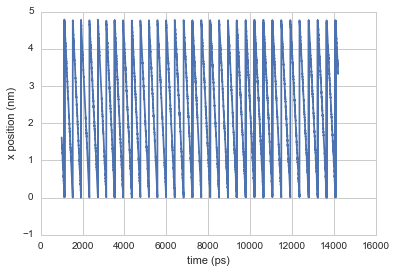

In [27]:
t = traj.time[toss:]
x = np.copy(traj.xyz[toss:, traj.n_atoms/2 + 2, 0])
plt.plot(t, x)
plt.xlabel('time (ps)')
plt.ylabel('x position (nm)')

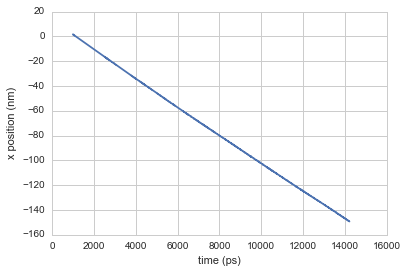

In [28]:
box_x = traj.unitcell_lengths[0, 0]

n_hops = np.zeros_like(x)
for i, p in enumerate(x):
    if p - x[i-1] > 0.5*box_x:
        n_hops[i:] += 1
    elif p - x[i-1] < -0.5*box_x:
        n_hops[i:] -= 1

x_no_hops = x - n_hops * box_x

plt.plot(t, x_no_hops)
plt.xlabel('time (ps)')
plt.ylabel('x position (nm)')

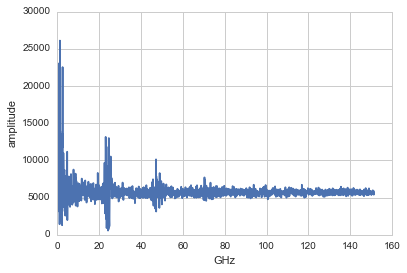

In [29]:
ft = np.fft.rfft(x_no_hops)
freq = np.fft.rfftfreq(len(x_no_hops), d=dt)
fig = plt.figure()
plt.plot(freq[10:2000]*1e3, np.real(ft[10:2000])**2)
plt.xlabel('GHz')
plt.ylabel('amplitude')
fig.savefig('alkane_n-100_l-6_fourier.pdf')

In [ ]:
from scipy.stats import linregress
slope, intercept, r, p, std_err  = linregress(t, x_no_slope)

x_no_slope = x_no_hops - (slope * t + intercept)

#t0, g, Neff_max = timeseries.detectEquilibration(x)
#x_equlibrated = x[t0:]
#plt.axvline(t[t0], color='red')

plt.plot(t, x_no_slope)
plt.xlabel('time (ps)')
plt.ylabel('x position (nm)')
print(r, p, std_err)

In [ ]:
fig = plt.figure()
ft = np.fft.rfft(x_no_slope)
freq = np.fft.rfftfreq(len(x_no_slope), d=dt)
plt.plot(freq[3:50]*1e3, np.real(ft[3:50])**2)
plt.xlabel('GHz')
plt.ylabel('amplitude')
fig.savefig('alkane_n-100_l-6_fourier.pdf')

In [ ]:
# compute FFT in moving windows across timeseries of fixed length 2**n
# plot peak location vs fft window #
# automatic equil detection for when peak stabilizes